In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
load_data = pd.read_excel("Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [5]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [7]:
data.corr()

,load
load,1.0


In [8]:
data.isnull().sum()

load    0
dtype: int64

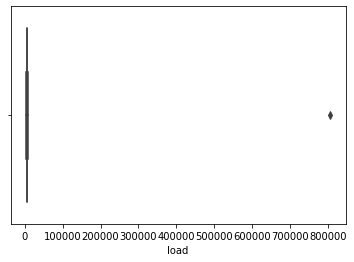

In [9]:
sns.boxplot(x=data['load'])

In [10]:
from scipy import stats
z = np.abs(stats.zscore(load_data.iloc[:,0]))
threshold = 3
print(np.where(z > 3))

(array([928]),)


In [11]:
data.iloc[928,0] = data.iloc[927,0]

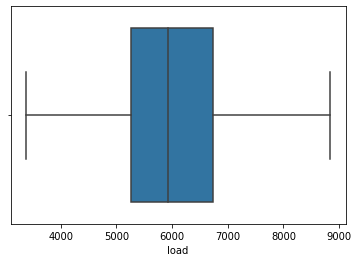

In [12]:
sns.boxplot(x=data['load'])

In [13]:
data_x = []
data_y = []
for i in range(0,len(data)-24):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+24,0])

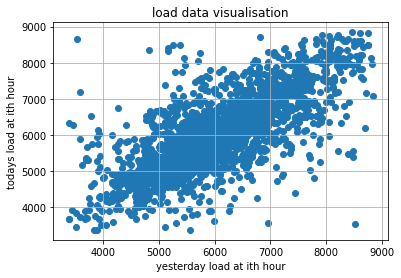

In [14]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()

In [16]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())

In [17]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [18]:
data_norm = []
for i in range(len(data)-24):
  data_norm.append([x[i],y[i]])
data_norm = pd.DataFrame(data_norm)
data_norm


,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472
...,...,...
2154,0.231719,0.228524
2155,0.445808,0.217797
2156,0.684146,0.246298
2157,0.514679,0.324384


In [19]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)
data_norm.head()

,0,1
0,0.293800,0.255799
1,0.276454,0.244501
2,0.310234,0.239965
3,0.332801,0.268466
4,0.414254,0.401472


In [20]:
data_x = np.array(data_train[0])
data_y = np.array(data_train[1])

In [21]:
m = 1
c = -1
iter = 1
epochs = 100
alpha = 0.1
ns = len(data_train)
error = []
vm = 0
vc = 0
moment = 0.9

In [23]:
while (iter<=epochs):
  for i in range(0,len(data_train)):
    der_m = (-1) * ((data_y[i] - (m * data_x[i]) - c ))*(data_x[i])
    der_c = (-1) * (data_y[i] - (m * data_x[i]) - c )
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    m = m + vm
    c = c + vc
  err=0
  for i in range(0,len(data_train)):
    err+=((data_y[i] - (m * data_x[i]) - c))**2
  err = (1/(2*len(data_train))) * err
  error.append(err)
    #incrementing no of iterations
  iter = iter + 1
print("m=",m,"\nc=",c)

m= 0.7933748671674037 
c= 0.24105638454959913


In [24]:
iters = np.arange(epochs)
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [25]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(data_y,pred)

In [ ]:
data_test

,0,1
1871,0.497161,0.445636
1088,0.520955,0.391487
1822,0.531312,0.593136
1811,0.328635,0.378705
1973,0.449003,0.340361
...,...,...
159,0.493310,0.800491
23,0.284300,0.381159
139,0.600782,0.794157
312,0.477818,0.503324


In [26]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

In [27]:
print("Mean squared error of Training data:",mse_train)
print("Mean squared error of Testing data:",mse_test)

Mean squared error of Training data: 0.037278292657929354
Mean squared error of Testing data: 0.03888105269670496


In [30]:
print("Model parameter:",m,c)

Model parameter: 0.7933748671674037 0.24105638454959913


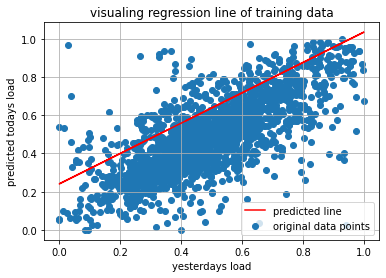

In [31]:
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

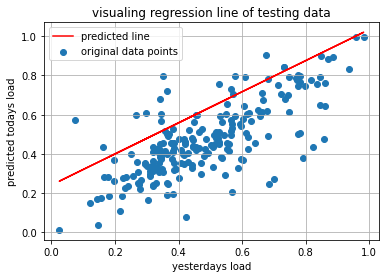

In [32]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("yesterdays load")
plt.ylabel("predicted todays load")
plt.grid()
plt.legend()

In [33]:
input_load = float(input("Enter yesterday load at this time: "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c
output_load = output_load*(max_y-min_y)+min_y
print("Predicted load for this hour is: ",output_load)

Enter yesterday load at this time: 5050.5
Predicted load for this hour is:  6021.97464483291
